와인품질 등급예측
  - 기술통계, 회귀분석, t-검증, 히스토그램
  - 캘리포니아 어바인대학의 머신러닝 저장소

  - 기술통계
    - 데이터의 특성을 나타내는 수치를 이용해 분석 기본통계방법
    - 평균, 중앙값, 최빈값 등
  - 회귀분석 : 예측
    - 독립변수(x), 종속변수(y)
    - 독립변수 한개이면 단순회귀분석, 여러개면 다중회귀분석
    - 선형회귀와 비선형회귀로 나눠짐
    - 선형(직선의 방정식)  y = ax1 + bx2 + cx3 + d
  - t-검증
    - 데이터에서 찾은 평균으로 두 그룹에 차이가 있는지 확인하는 방법
    - A와인의 품질이 1등급인지 2등급인지에 따라서 가격에 차이가 있는지 확인
  - 히스토그램
    - 데이터의 값의 범위를 구간으로 나눠서 빈도수를 차트로

  - 데이터
    - https://archive.ics.uci.edu/

In [2]:
!unzip '/content/drive/MyDrive/wine/wine+quality.zip'

Archive:  /content/drive/MyDrive/wine/wine+quality.zip
  inflating: winequality-red.csv     
  inflating: winequality-white.csv   
  inflating: winequality.names       


In [3]:
import pandas as pd

In [6]:
red_df = pd.read_csv('/content/winequality-red.csv',sep=';')
white_df = pd.read_csv('/content/winequality-white.csv',sep=';')

In [8]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
red_df.shape,white_df.shape

((1599, 12), (4898, 12))

In [12]:
red_df['type'] = 'red'
white_df['type'] = 'white'

In [13]:
df = pd.concat( [red_df,white_df] )
df.shape

(6497, 13)

In [15]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [16]:
# 기본정보 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [19]:
df.describe(include = 'object')

,type
count,6497
unique,2
top,white
freq,4898


In [20]:
df.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN


In [21]:
df['quality']

0       5
1       5
2       5
3       6
4       5
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 6497, dtype: int64

In [22]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [23]:
import seaborn as sns

<Axes: xlabel='quality', ylabel='count'>

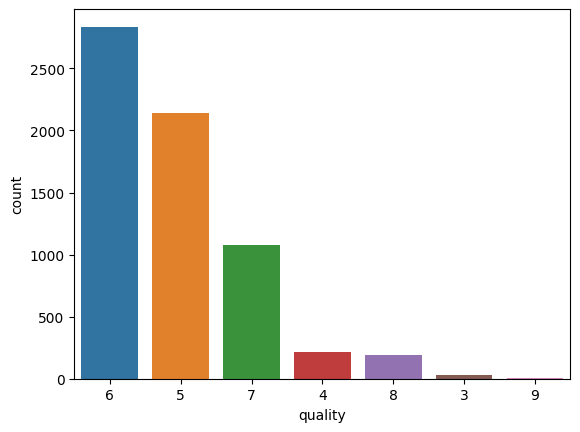

In [40]:
# df = df.sort_values(by='quality')
# sorted(df['quality'].unique())
order = df['quality'].value_counts().index
sns.countplot(data=df , x = 'quality' , order=order    )

In [43]:
df.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [44]:
df.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [45]:
df.groupby('type')['quality'].std()

type
red      0.807569
white    0.885639
Name: quality, dtype: float64

In [46]:
df.groupby('type')['quality'].agg(['mean','std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


  - t-검증 : scipy 라이브러리
  - 회귀분석 : statemodels 라이브러리  

In [ ]:
!pip install statsmodels

In [48]:
from scipy import stats
from statsmodels.formula.api import ols, glm

In [50]:
red_wine_quality = df.loc[df['type'] == 'red','quality']
white_wine_quality = df.loc[df['type'] == 'white','quality']

In [51]:
# scipy 패키지의 status.ttest_ind()함수를 사용해서 t-검증을 하고 두 그룹강의 차이를 확인

In [52]:
stats.ttest_ind(red_wine_quality,white_wine_quality,equal_var=False)
# statistic 두 집단의 평균의 차이.. 차이가 없으면 0 이고 크면 차이가 크다
# 음수는 첫번째 집단의 평균이 두번째 보다 작다
# pvalue

Ttest_indResult(statistic=-10.149363059143168, pvalue=8.168348870049335e-24)

In [60]:
1e-3

0.001

In [67]:
df.columns =  df.columns.str.replace(" ", "_")

In [68]:
Rformula = "quality~" +  "+".join(df.columns[:-2])
result = ols(Rformula,data=df).fit()   # OLSOrdinary Least Square 모델

In [69]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:37:02   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   0.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
df2 = df.drop(columns=['citric_acid','chlorides'])
Rformula2 = "quality~" +  "+".join(df2.columns[:-2])
result2 = ols(Rformula2,data=df2).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     296.7
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:50:07   Log-Likelihood:                -7217.8
No. Observations:                6497   AIC:                         1.446e+04
Df Residuals:                    6487   BIC:                         1.452e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               60.0409     11.645      5.156      0.000      37.212      82.870
fixed_acidity            0.0662      0.015      4.412      0.000       0.037       0.096
volatile_acidity        -1.3043      0.071    -18.445      0.000      -1.443      -1.166
residual_sugar           0.0453      0.005      9.024      0.000       0.035       0.055
free_sulfur_dioxide      0.0059      0.001      7.911      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -9.217      0.000      -0.003      -0.002
density                -59.4185     11.873     -5.004      0.000     -82.694     -36.143
pH                       0.4782      0.088      5.411      0.000       0.305       0.651
sulphates                0.7378      0.075      9.903      0.000       0.592       0.884
alcohol                  0.2647      0.017     15.886      0.000       0.232       0.297
==============================================================================
Omnibus:                      144.178   Durbin-Watson:                   0.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.085
Skew:                          -0.004   Prob(JB):                     2.56e-71
Kurtosis:                       4.096   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
df.columns[:-2]

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [107]:
Rformula2

'quality~fixed_acidity+volatile_acidity+residual_sugar+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol'

데이터 모델링
  - 회귀분석 모델로 새로운 샘플의 품질 등급 예측

In [72]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
3810,6.8,0.260,0.34,15.1,0.060,42.0,162.0,0.99705,3.24,0.52,10.5,3,white
445,7.1,0.320,0.32,11.0,0.038,16.0,66.0,0.99370,3.24,0.40,11.5,3,white
873,10.3,0.170,0.47,1.4,0.037,5.0,33.0,0.99390,2.89,0.28,9.6,3,white
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3,red
2050,11.8,0.230,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55,9.7,3,white


In [74]:
# 오리지널 데이터에서 정답과 type을 제외한 컬럼을 가지는 df의 셈플을 추출

In [86]:
sample1 = df.iloc[:,:-2][:5]
sample1_y = df.iloc[:,-2][:5]
sample1_predict = result.predict(sample1)
sample1_predict, sample1_y

(3810    6.139780
 445     6.356622
 873     5.590185
 1374    4.878446
 2050    5.815154
 dtype: float64,
 3810    3
 445     3
 873     3
 1374    3
 2050    3
 Name: quality, dtype: int64)

결과 시각화
  - 부분 회귀 플랏
    - 독립변수가 2개 이상인경우 부분회귀 플랏을 사용해서 하나의 독립변수가 종속 변수에 미치는 영향력을 시각화

In [89]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

eval_env: 1


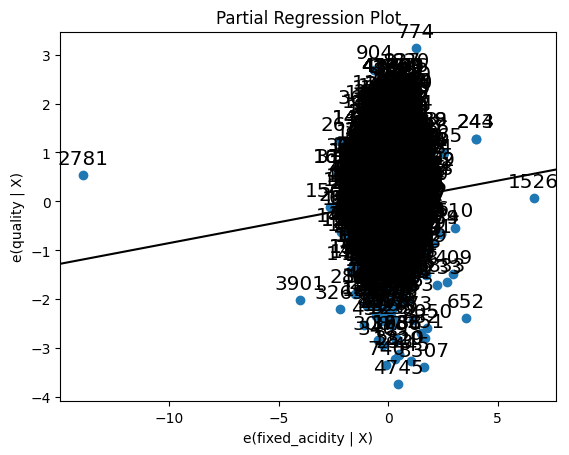

In [96]:
others = list(df.columns.difference(['quality','fixed_acidity']))
p,resides =  sm.graphics.plot_partregress('quality','fixed_acidity',others,data = df,ret_coords=True)
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


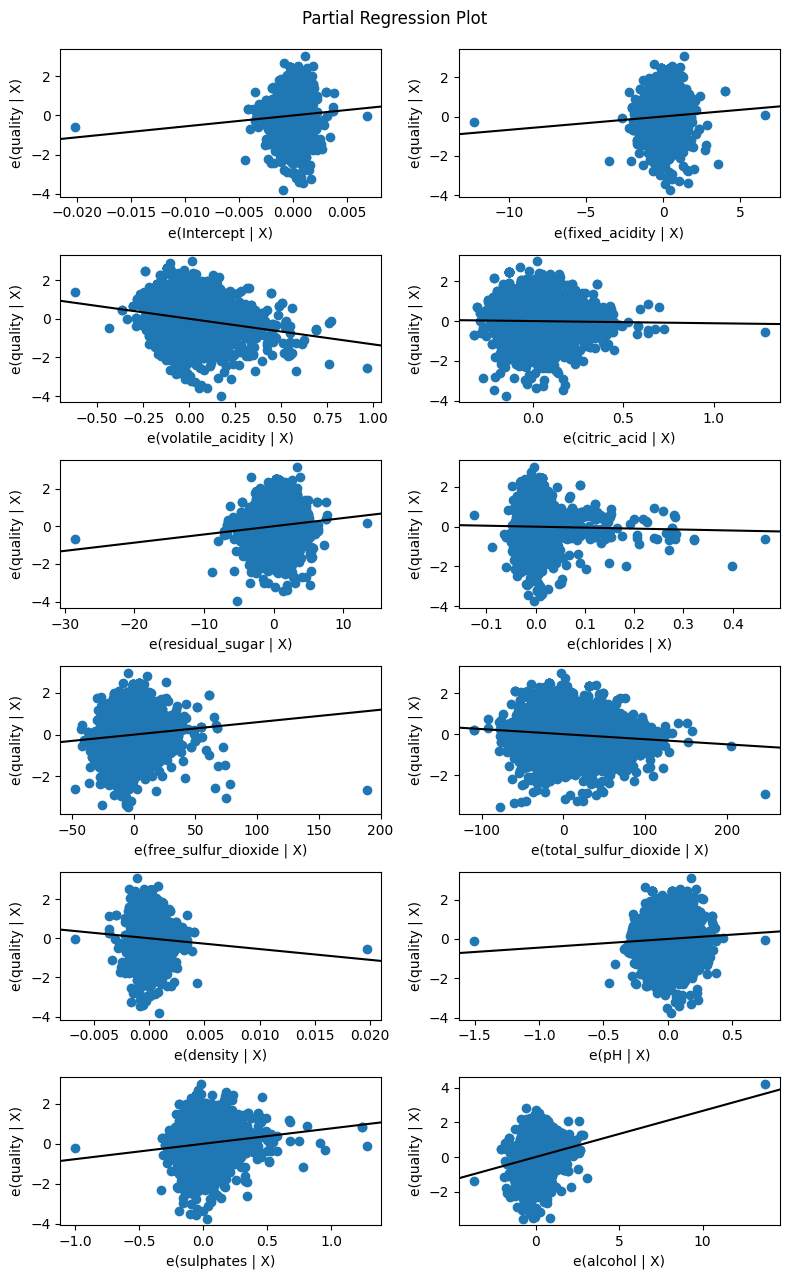

In [97]:
fig = plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(result,fig=fig)
plt.show()

In [106]:
# df.iloc[0:3,0:3]
df.iloc[ : , :-2 ]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
3810,6.8,0.260,0.34,15.1,0.060,42.0,162.0,0.99705,3.24,0.52,10.5
445,7.1,0.320,0.32,11.0,0.038,16.0,66.0,0.99370,3.24,0.40,11.5
873,10.3,0.170,0.47,1.4,0.037,5.0,33.0,0.99390,2.89,0.28,9.6
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8
2050,11.8,0.230,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55,9.7
...,...,...,...,...,...,...,...,...,...,...,...
820,6.6,0.360,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4
876,6.9,0.360,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7
827,7.4,0.240,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5
774,9.1,0.270,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4
